In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_csv = "data/mouse_drug_data.csv"
clinical_trial_csv = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_csv)
clincial_trial_df = pd.read_csv(clinical_trial_csv)



In [2]:
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
clincial_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_clinical_data = pd.merge(clincial_trial_df, mouse_drug_df, on="Mouse ID")

# Display the data table for preview
combined_clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint_groups = combined_clinical_data.groupby(["Drug", "Timepoint"])
mean_tumor_volume = drug_timepoint_groups["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume).reset_index()
# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SEM_tumor_volumes = drug_timepoint_groups["Tumor Volume (mm3)"].sem().reset_index()
# Convert to DataFrame
SEM_tumor_volumes_df = pd.DataFrame(SEM_tumor_volumes)

# Preview DataFrame
SEM_tumor_volumes_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
volume_pivot = mean_tumor_volume_df.pivot(index="Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
# Preview that Reformatting worked
volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [8]:
sem_volume_pivot = SEM_tumor_volumes_df.pivot(index="Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
sem_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


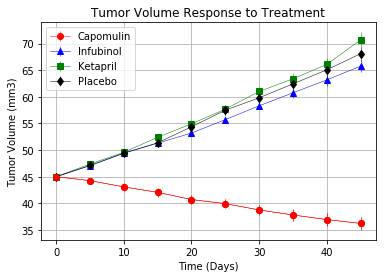

In [12]:
# Generate the Plot (with Error Bars)

#generate the x-axis
x_axis = combined_clinical_data["Timepoint"].unique()

#generate the standard error bars
capomulin_sem = sem_volume_pivot["Capomulin"].unique()
infubinoln_sem = sem_volume_pivot["Infubinol"].unique()
ketapril_sem = sem_volume_pivot["Ketapril"].unique()
placebo_sem = sem_volume_pivot["Placebo"].unique()

#range for the drug
capomulin = volume_pivot["Capomulin"].unique()
infubinoln = volume_pivot["Infubinol"].unique()
ketapril = volume_pivot["Ketapril"].unique()
placebo = volume_pivot["Placebo"].unique()

#create all the pieces for the line graph
plt.errorbar(x_axis, capomulin, yerr=capomulin_sem, linewidth=0.5, color="red", marker="o", label="Capomulin")
plt.errorbar(x_axis, infubinoln, yerr=infubinoln_sem, linewidth=0.5, color="blue", marker="^", label="Infubinol")
plt.errorbar(x_axis, ketapril, yerr=ketapril_sem, linewidth=0.5, color="green", marker="s", label="Ketapril")
plt.errorbar(x_axis, placebo, yerr=placebo_sem, linewidth=0.5, color="black", marker="d", label="Placebo")
plt.legend(loc="best")

plt.errorbar(x_axis, capomulin, yerr=capomulin_sem, linewidth=0.5, color="red", marker="o", label="Capomulin")


#add titles to the chart
plt.title("Tumor Volume Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig("Images/TumorVolumeResponsetoTx.png")

#show the graph
plt.grid()
plt.show()

In [10]:
# Show the Figure
plt.show()

In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()